In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [ ]:
# Unduh stopwords (jika belum)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Membaca dataset
data = pd.read_excel('calon3.xlsx')  # File input
data.columns = ['cleaned_full_text', 'Sentimen']

In [ ]:
print(data.head())

                                   cleaned_full_text Sentimen
0  PDIP menurunkan mantan aktor senior Rano Karno...      pos
1  Aminah Cendrakasih mulai bermain film sejak ta...      pos
2                  Hei Bukalah Kacamatamu Rano Karno      pos
3  @nico_inoo @sausntartar @tanyakanrl Setahuku, ...      pos
4  @yagimanayague @tanyakanrl Pintarnya si Rano K...      pos


In [ ]:
# Inisialisasi Stopwords dan Stemmer
stop_words = set(stopwords.words('indonesian'))
ps = PorterStemmer()

In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'http\S+|www\S+', '', text)  # Hapus URL
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = text.lower()  # Ubah ke huruf kecil
    return text

In [ ]:
# Fungsi untuk stemming dan menghapus stopwords
def preprocess_text(text):
    text = clean_text(text)
    text = " ".join([ps.stem(word) for word in text.split() if word not in stop_words])  # Stemming dan hapus stopwords
    return text

In [ ]:
# Preprocessing data
data['cleaned_text'] = data['cleaned_full_text'].apply(preprocess_text)

In [ ]:
print(data.head())

                                   cleaned_full_text Sentimen  \
0  PDIP menurunkan mantan aktor senior Rano Karno...      pos   
1  Aminah Cendrakasih mulai bermain film sejak ta...      pos   
2                  Hei Bukalah Kacamatamu Rano Karno      pos   
3  @nico_inoo @sausntartar @tanyakanrl Setahuku, ...      pos   
4  @yagimanayague @tanyakanrl Pintarnya si Rano K...      pos   

                                        cleaned_text  
0  pdip menurunkan mantan aktor senior rano karno...  
1  aminah cendrakasih bermain film kali beradu pe...  
2                  hei bukalah kacamatamu rano karno  
3  setahuku rano karno menyutradarai kak sutradar...  
4                  pintarnya si rano karno ceritanya  


# Preprocessing data
data['cleaned_text'] = data['cleaned_full_text'].apply(preprocess_text)

In [ ]:
# Memisahkan fitur (teks) dan label (sentimen)
X = data['cleaned_text']
y = data['Sentimen']

In [ ]:
# Vectorisasi menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [ ]:
# Evaluasi Naive Bayes
print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

=== Naive Bayes ===
Accuracy: 0.8170731707317073
              precision    recall  f1-score   support

         neg       1.00      0.06      0.12        16
         pos       0.81      1.00      0.90        66

    accuracy                           0.82        82
   macro avg       0.91      0.53      0.51        82
weighted avg       0.85      0.82      0.75        82



In [ ]:
# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Evaluasi SVM
print("\n=== Support Vector Machine (SVM) ===")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


=== Support Vector Machine (SVM) ===
Accuracy: 0.8048780487804879
              precision    recall  f1-score   support

         neg       0.50      0.12      0.20        16
         pos       0.82      0.97      0.89        66

    accuracy                           0.80        82
   macro avg       0.66      0.55      0.54        82
weighted avg       0.76      0.80      0.75        82



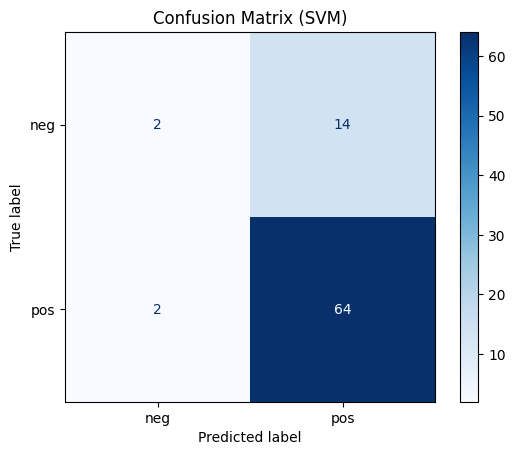

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# === Confusion Matrix ===
cm = confusion_matrix(y_test, svm_predictions, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.show()

In [ ]:
# === Kata Kunci Berdasarkan Label ===
def get_top_keywords(label, model, vectorizer, X, y, top_n=20):
    idx = y[y == label].index
    word_freq = pd.DataFrame({
        'word': vectorizer.get_feature_names_out(),
        'frequency': X[idx].sum(axis=0).A1
    })
    return word_freq.sort_values(by='frequency', ascending=False).head(top_n)

print("\n=== Kata Kunci Paling Sering Muncul ===")
print("Positif:")
print(get_top_keywords('pos', svm_model, vectorizer, X_vectorized, y))
print("\nNegatif:")
print(get_top_keywords('neg', svm_model, vectorizer, X_vectorized, y))


=== Kata Kunci Paling Sering Muncul ===
Positif:
                word  frequency
748               ma  23.242402
1159            pram  20.742114
519          jakarta  20.133072
1208            rano  18.714852
584            karno  18.338666
350             doel  15.294854
97              bang  15.145520
899          menyala  12.798421
53               ani  11.997972
520   jakartamenyala  11.759631
1165         pramono   9.897122
645            keren   8.986189
59             anung   8.557091
771           mantap   8.310681
1511           warga   7.028014
1130           pilih   6.055680
438         gubernur   5.950375
1131         pilihan   5.558612
834           menang   5.405589
18               aja   5.272724

Negatif:
            word  frequency
1208        rano   5.860817
584        karno   5.734578
978        nggak   3.520643
53           ani   3.314499
1527          ya   2.955441
105      banteng   2.929092
1317         sih   2.257050
1165     pramono   2.202632
2           abah

In [ ]:
def get_keyword_confidence(model, vectorizer, top_n=20):
    """
    Menghitung confidence kata untuk label positif dan negatif.
    Confidence didasarkan pada koefisien model SVM.
    """
    # Ambil koefisien model
    if hasattr(model, 'coef_'):
        coefficients = model.coef_.toarray()[0]  # Koefisien untuk SVM linear
    else:
        raise ValueError("Model tidak mendukung akses koefisien.")

    # Ambil daftar kata
    words = vectorizer.get_feature_names_out()

    # Gabungkan kata dengan koefisiennya
    word_confidence = pd.DataFrame({
        'word': words,
        'confidence': coefficients
    })

    # Pisahkan ke positif dan negatif
    top_positive = word_confidence.sort_values(by='confidence', ascending=False).head(top_n)
    top_negative = word_confidence.sort_values(by='confidence', ascending=True).head(top_n)

    return top_positive, top_negative


# Ambil confidence untuk kata positif dan negatif
top_positive_confidence, top_negative_confidence = get_keyword_confidence(svm_model, vectorizer)

print("\n=== Kata dengan Confidence Tertinggi (Positif) ===")
print(top_positive_confidence)

print("\n=== Kata dengan Confidence Tertinggi (Negatif) ===")
print(top_negative_confidence)



=== Kata dengan Confidence Tertinggi (Positif) ===
                word  confidence
748               ma    1.047125
772          manusia    0.861451
97              bang    0.858183
520   jakartamenyala    0.832771
440              gue    0.775551
645            keren    0.692866
1131         pilihan    0.632804
1283        semangat    0.632564
771           mantap    0.632517
899          menyala    0.632188
1359           suara    0.609218
118             beda    0.605981
1049        panggung    0.593081
350             doel    0.582836
1511           warga    0.581457
550           jokowi    0.564219
646            kerja    0.531238
244             coba    0.527096
53               ani    0.514650
137         berharap    0.494043

=== Kata dengan Confidence Tertinggi (Negatif) ===
             word  confidence
105       banteng   -2.032078
1317          sih   -1.558771
874    mengkritik   -1.140484
2            abah   -1.117211
746          lupa   -1.027004
1292       senyum   -1.

In [ ]:
# === Prediksi Tweet Baru ===
def predict_new_tweet(tweet, vectorizer, model):
    processed_tweet = preprocess_text(tweet)
    tweet_vectorized = vectorizer.transform([processed_tweet])
    prediction = model.predict(tweet_vectorized)[0]
    return prediction

In [ ]:
# Input user untuk tweet baru
new_tweet = input("\nMasukkan tweet baru untuk prediksi: ")
sentiment = predict_new_tweet(new_tweet, vectorizer, svm_model)
print(f"Prediksi sentimen untuk tweet: '{new_tweet}' adalah: {sentiment}")


Masukkan tweet baru untuk prediksi: pembohong kau pembohong
Prediksi sentimen untuk tweet: 'pembohong kau pembohong' adalah: pos


In [ ]:
# Simpan hasil preprocessing dan kata kunci ke file Excel
data[['cleaned_full_text', 'cleaned_text', 'Sentimen']].to_excel('preprocessed_data.xlsx', index=False)